<a href="https://colab.research.google.com/github/alex-smith-uwec/CS-420/blob/main/markov/mdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sources:

 [Markov decision process: complete explanation of basics with a grid world example](https://medium.com/@ngao7/markov-decision-process-basics-3da5144d3348)

[Author's GitHub](https://github.com/clumsyhandyman/mad-from-scratch/blob/main/MarkovDecissionProcess/README.md)

# Start up

In [1]:
from google.colab import drive
drive.mount('/content/drive')
mypath='/content/drive/MyDrive/CS_420/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from time import time
import sys

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

In [4]:
sys.path.insert(0,mypath)

In [5]:
import GridWorld
import PolicyIteration
import ValueIteration
from GridWorld import GridWorld as gw
from PolicyIteration import PolicyIteration as PolicyIteration
from ValueIteration import ValueIteration as ValueIteration


# Setting up grid world and exploring different policies

This provides good background and exploration of Markov decision process in the context of grid world--see AIMA, beginning of Chapter 17. This leads one to appreciate the question "How do we find an optimal policy?" This motivates Bellman's equation, reinforcement learning, etc.

In [6]:
reward_dict = {0: -0.04, 1: 1.0, 2: -1.0, 3: np.NaN}
grid_world = gw(mypath+'world00.csv', reward=reward_dict, random_rate=0.2)

For other grid world start up configs see [Example csv files](https://github.com/clumsyhandyman/mad-from-scratch/tree/main/MarkovDecissionProcess/data)

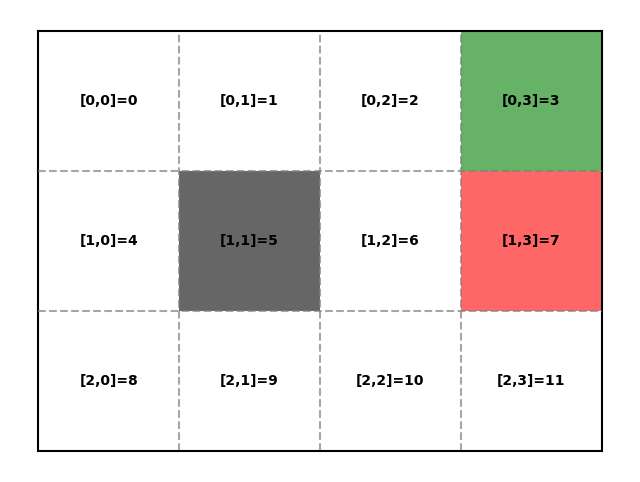

In [ ]:
#@title

def plot_map_loc_help(self, fig_size=(8, 6)):
    unit = min(fig_size[1] // self.num_rows, fig_size[0] // self.num_cols)
    unit = max(1, unit)
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    ax.axis('off')
    counter = 0
    for i in range(self.num_cols + 1):
        if i == 0 or i == self.num_cols:
            ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                    color='black')
        else:
            ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                    alpha=0.7, color='grey', linestyle='dashed')
    for i in range(self.num_rows + 1):
        if i == 0 or i == self.num_rows:
            ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                    color='black')
        else:
            ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                    alpha=0.7, color='grey', linestyle='dashed')

    for i in range(self.num_rows):
        for j in range(self.num_cols):
            y = (self.num_rows - 1 - i) * unit
            x = j * unit
            if self.map[i, j] == 3:
                rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='black',
                                         alpha=0.6)
                ax.add_patch(rect)
            elif self.map[i, j] == 2:
                rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='red',
                                         alpha=0.6)
                ax.add_patch(rect)
            elif self.map[i, j] == 1:
                rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='green',
                                         alpha=0.6)
                ax.add_patch(rect)

            ax.text(x + unit/2, y + unit/2, f'[{i},{j}]={counter}',
                    ha='center', va='center', fontsize=10, color='black', weight='bold')
            counter += 1

    # plt.tight_layout()
    plt.show()

plot_map_loc_help(grid_world)

In [7]:
policy0=[1]*12
# 0 up, 1 right, 2 down, 3 left
# policy_opt

In [8]:
policy0

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [9]:
policy_opt=[1,1,1,1,0,0,0,0,0,3,0,3]

In [10]:
policy_rand=gw.generate_random_policy(grid_world)
print(policy_rand)

[1 3 1 3 2 3 3 1 2 2 1 2]


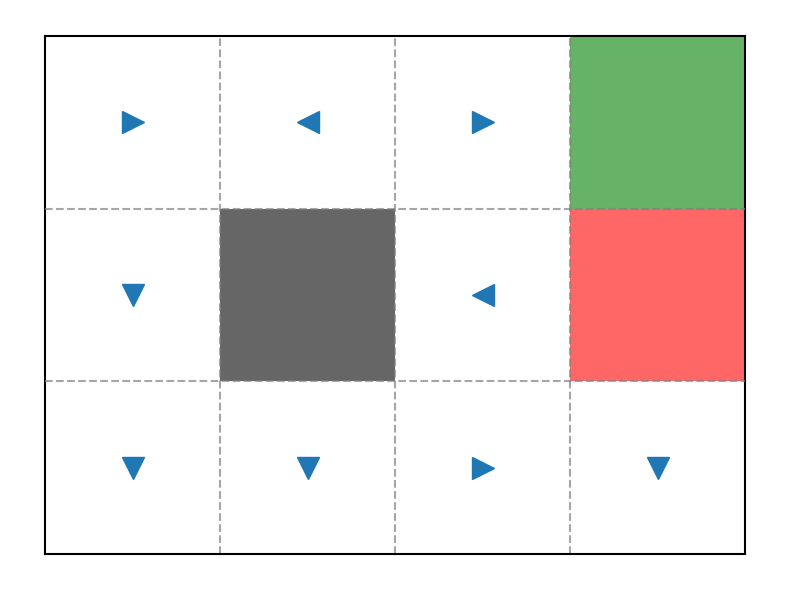

In [11]:
grid_world.plot_policy(policy_rand)#replace policy_rand by others such as policy0, policy_opt

In [12]:
# grid_world.get_transition_model()
# grid_world.get_reward_function()
grid_world.execute_policy(policy_opt,[2,0],True)


(0.76, [8, 4, 0, 1, 1, 2, 3])

max = 0.8
min = -1.6
mean = 0.706028
median = 0.76
std = 0.24515885302391183


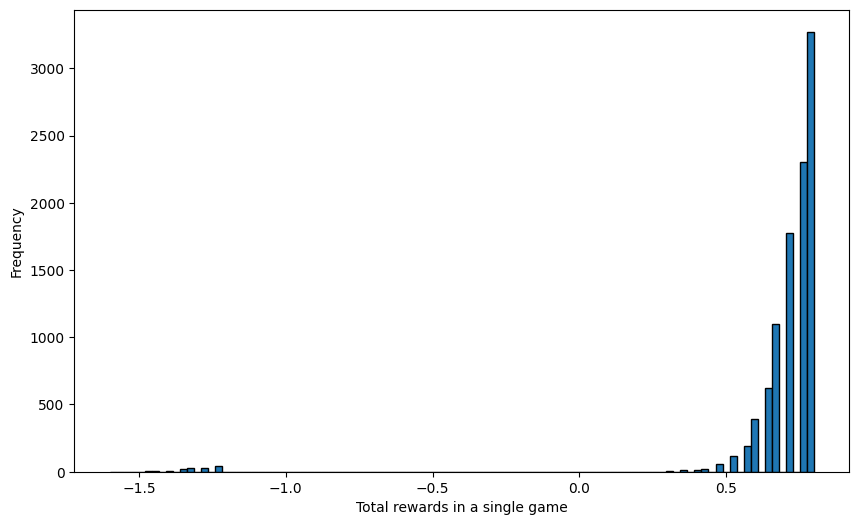

(0.8, -1.6, 0.706028, 0.76)

In [13]:
grid_world.random_start_policy(policy_opt,[2,0], n=10000)
#For small n maybe uncomment this in GridWorld.py
# print(f'i = {i} Random start result: {temp}')
##Explore outcomes for other policies.

# Policy Iteration

[Policy Iteration by author of PolicyIteration.py](https://medium.com/@ngao7/markov-decision-process-policy-iteration-42d35ee87c82)

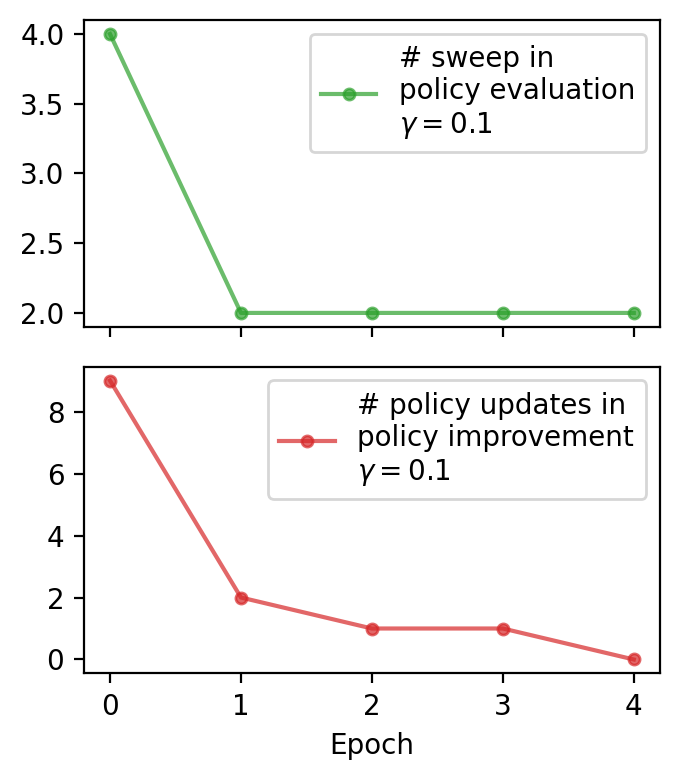

/content/drive/MyDrive/CS_420/GridWorldDev.py:282: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


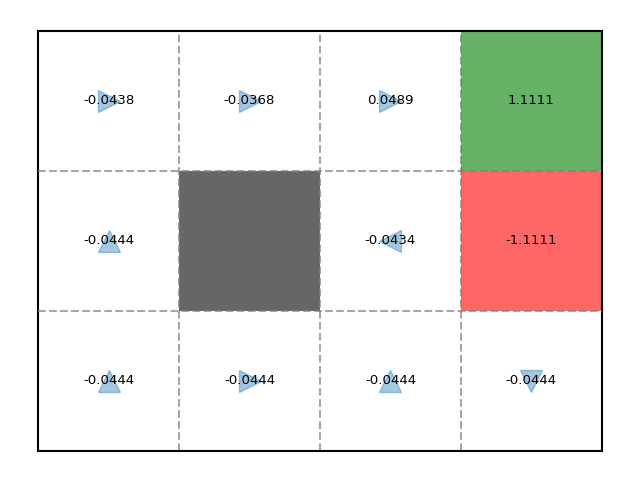

In [ ]:
solver = PolicyIteration(grid_world.reward_function, grid_world.transition_model, gamma=.1, init_policy=policy0)
solver.train()

grid_world.visualize_value_policy(policy=solver.policy, values=solver.values)
# grid_world.random_start_policy(policy=solver.policy, start_pos=(2, 0), n=1000)

# Value Iteration
[Value Iteration by author of ValueIteration.py](https://medium.com/@ngao7/markov-decision-process-value-iteration-2d161d50a6ff)

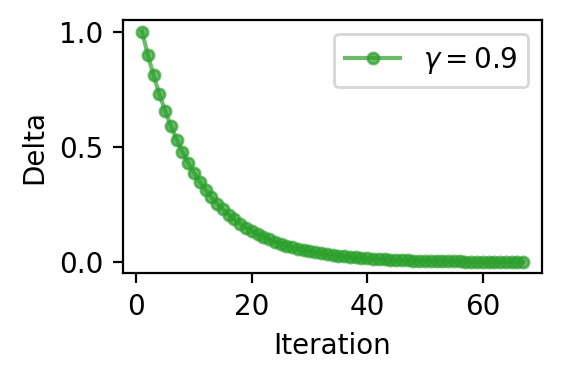

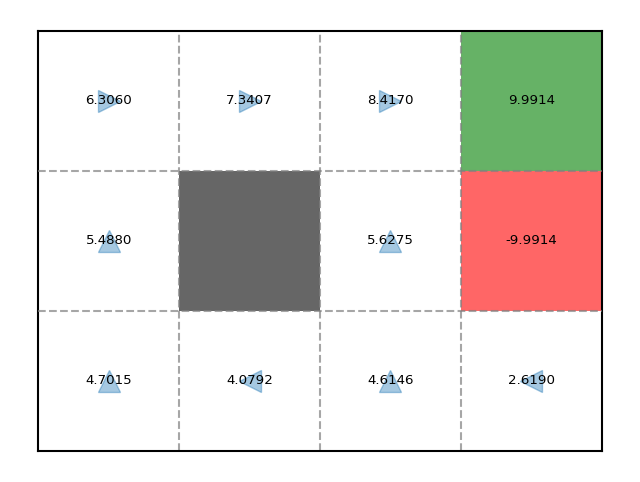

In [ ]:
solver = ValueIteration(grid_world.reward_function, grid_world.transition_model, gamma=.9)
solver.train()

grid_world.visualize_value_policy(policy=solver.policy, values=solver.values)
# grid_world.random_start_policy(policy=solver.policy, start_pos=(2, 0), n=100)
